### Question 1

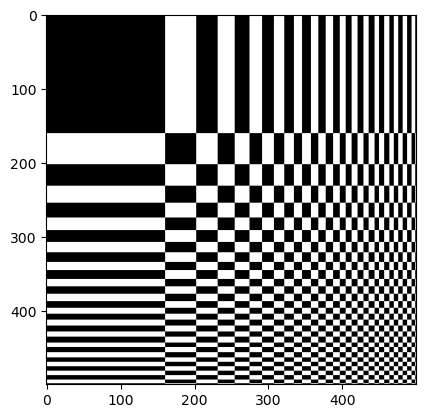

In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image1 = Image.open('dynamicCheckerBoard.png')
image = np.asarray(image1)
plt.imshow(image, cmap = 'gray');

In [21]:
def dft(image):
    dft_img_shift=np.fft.fftshift(image)
    dft_img=np.fft.fft2(dft_img_shift)
    dft_img=np.abs(dft_img)
    return dft_img

In [22]:
def idft(img):
    idft_img=np.fft.ifft2(img)
    idft_shift_img=np.fft.fftshift(idft_img)
    idft_shift_img=np.abs(idft_shift_img)
    return idft_shift_img

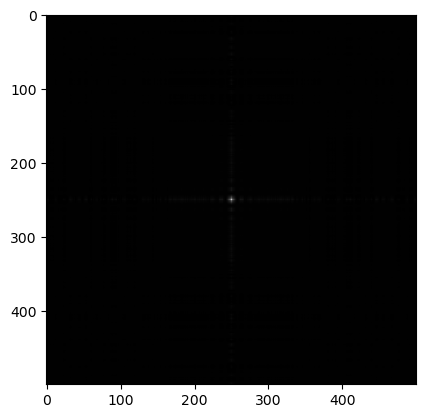

In [23]:
img3=dft(image)
img4=idft(img3)
#plt.imshow(img4,cmap='gray')
plt.imshow(img4, cmap = 'gray')

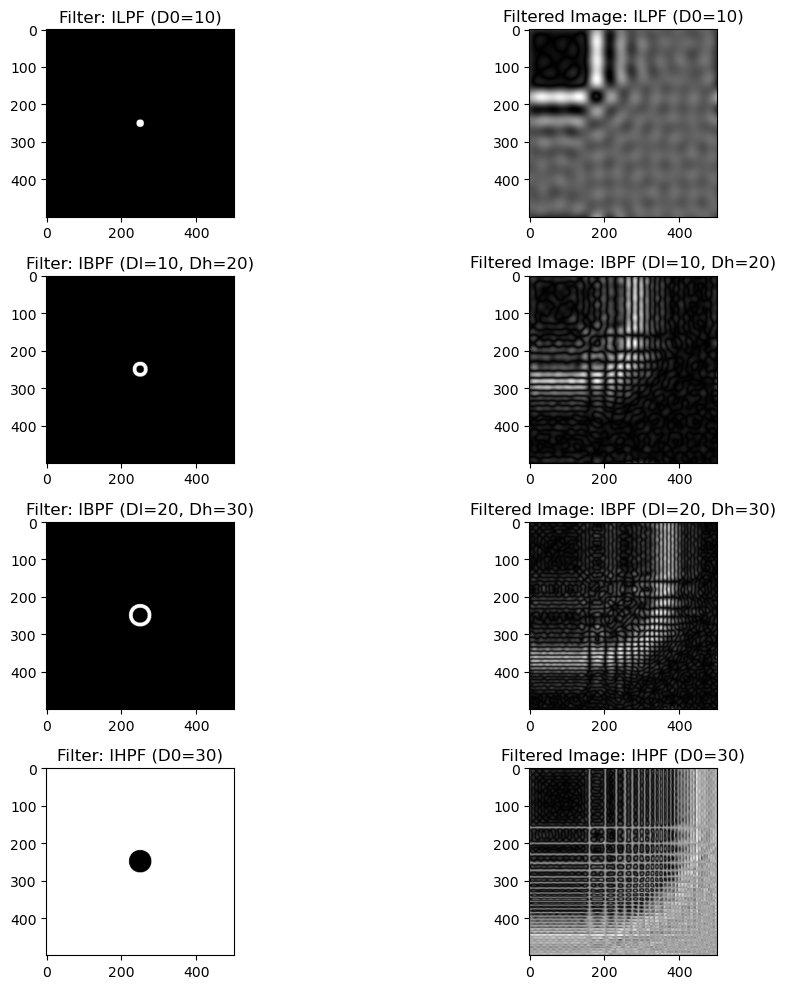

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Distance D(u, v) from center
def compute_distance(rows, cols):
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    distance_uv = np.sqrt((u - cols / 2) ** 2 + (v - rows / 2) ** 2)
    return distance_uv

# Ideal Low Pass Filter (ILPF)
def ideal_low_pass_filter(rows, cols, cutoff_freq):
    distance_uv = compute_distance(rows, cols)
    H_lowpass = np.where(distance_uv <= cutoff_freq, 1, 0)
    return H_lowpass

# Ideal High Pass Filter (IHPF)
def ideal_high_pass_filter(rows, cols, cutoff_freq):
    H_lowpass = ideal_low_pass_filter(rows, cols, cutoff_freq)
    H_highpass = 1 - H_lowpass
    return H_highpass

# Ideal Band Pass Filter (IBPF)
def ideal_band_pass_filter(rows, cols, low_cutoff, high_cutoff):
    H_lowpass_highcutoff = ideal_low_pass_filter(rows, cols, high_cutoff)
    H_highpass_lowcutoff = ideal_high_pass_filter(rows, cols, low_cutoff)
    H_bandpass = H_lowpass_highcutoff * H_highpass_lowcutoff
    return H_bandpass

# Filter in the frequency domain
def apply_filter(image, filter_function, *filter_params):
    
    rows, cols = image.shape
    
    
    dft_image = np.fft.fft2(image)
    dft_image_shifted = np.fft.fftshift(dft_image)
    
   
    filter_mask = filter_function(rows, cols, *filter_params)
    
    
    filtered_dft = dft_image_shifted * filter_mask
    
    
    filtered_image_shifted = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(filtered_image_shifted)
    
    
    filtered_image = np.abs(filtered_image)
    
    return filter_mask, filtered_image


filter_dict = {
    "ILPF (D0=10)": (ideal_low_pass_filter, 10),
    "IBPF (Dl=10, Dh=20)": (ideal_band_pass_filter, 10, 20),
    "IBPF (Dl=20, Dh=30)": (ideal_band_pass_filter, 20, 30),
    "IHPF (D0=30)": (ideal_high_pass_filter, 30),
}


plt.figure(figsize=(12, 10))

for i, (filter_name, (filter_function, *params)) in enumerate(filter_dict.items()):
    filter_mask, filtered_image = apply_filter(image, filter_function, *params)
    
    
    plt.subplot(4, 2, 2 * i + 1)
    plt.imshow(filter_mask, cmap='gray')
    plt.title(f"Filter: {filter_name}")
    
    
    plt.subplot(4, 2, 2 * i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"Filtered Image: {filter_name}")

plt.tight_layout()
plt.show()

### QUESTION 2

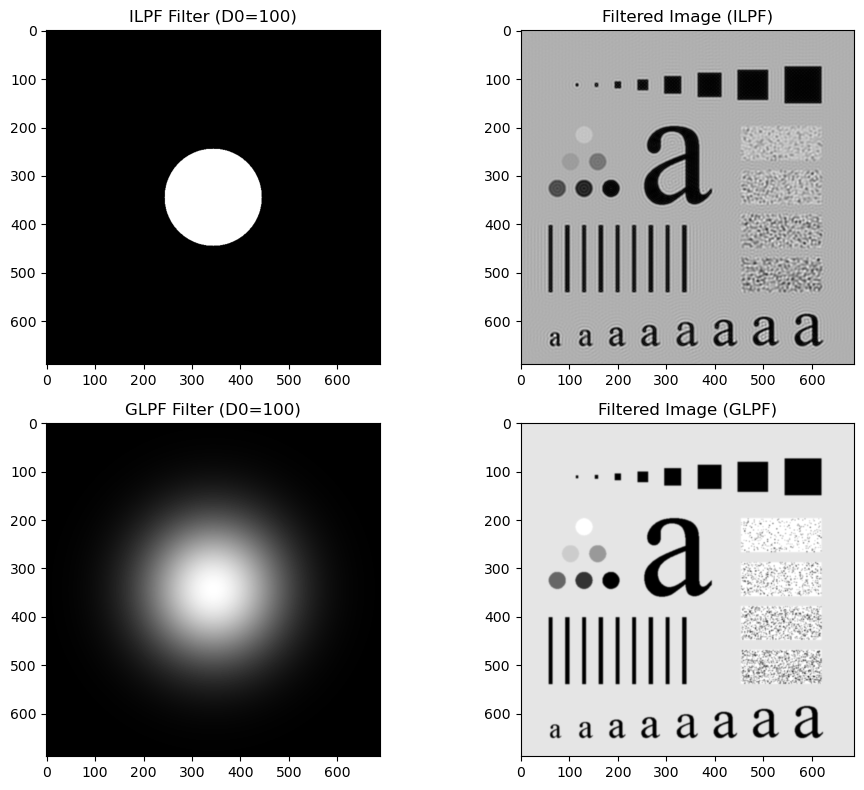

In [25]:

def gaussian_low_pass_filter(P, Q, D0):
    D_uv = compute_distance(P, Q)
    H_GLPF = np.exp(-(D_uv ** 2) / (2 * D0 ** 2))
    return H_GLPF

image_characters = Image.open('characters.tif')
image_characters1 = np.asarray(image_characters)



D0 = 100


H_ILPF, filtered_ILPF = apply_filter(image_characters1, ideal_low_pass_filter, D0)


H_GLPF, filtered_GLPF = apply_filter(image_characters1, gaussian_low_pass_filter, D0)


plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.imshow(H_ILPF, cmap='gray')
plt.title('ILPF Filter (D0=100)')

plt.subplot(2, 2, 2)
plt.imshow(filtered_ILPF, cmap='gray')
plt.title('Filtered Image (ILPF)')


plt.subplot(2, 2, 3)
plt.imshow(H_GLPF, cmap='gray')
plt.title('GLPF Filter (D0=100)')

plt.subplot(2, 2, 4)
plt.imshow(filtered_GLPF, cmap='gray')
plt.title('Filtered Image (GLPF)')

plt.tight_layout()
plt.show()
